In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# N-Uplets of dimensions encoding Gender in Nouns

In this Notebook: A replica of the experiment in [this Notebook](noun_verb_pos_dim_clustering.ipynb), now applied to **gender** in **Nouns**.

In [2]:
# Data loading
all_n_we = pd.read_csv('../Data/all_nouns_we.csv', index_col=0)
all_nouns_with_freq = pd.read_csv('../Data/freq_NOUN.csv', index_col='Word')
all_n_we_with_freq = all_n_we.merge(all_nouns_with_freq, left_index=True, right_index=True).sort_values(by='freq', ascending=False)

# Comparing sizes of masculine and feminine nouns
fem_df = all_n_we_with_freq[all_n_we_with_freq["gender"] == "feminine"]
masc_df = all_n_we_with_freq[all_n_we_with_freq["gender"] == "masculine"]
print(fem_df.shape)
print(masc_df.shape)

(5434, 517)
(5961, 517)


In [3]:
all_n_we_with_freq.head()

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,gn,gender,lemme,cgram,freq
chose,0.657807,1.650356,2.463752,-4.890357,-0.208469,-5.273172,-2.022167,3.938069,-1.886973,0.658918,...,-3.652611,0.059850,-4.353068,-1.477708,-6.344492,singular,feminine,chose,NOM,1321.79
vie,0.728105,-3.619239,6.010180,-3.412671,4.317724,-2.456576,-3.586677,1.279530,0.782081,-1.396616,...,-5.433400,-2.438175,-2.297100,-0.613292,1.389376,singular,feminine,vie,NOM,986.59
fois,0.930591,0.391257,-0.526626,1.497111,-1.076748,2.202879,-1.588476,-0.458471,-1.804767,-0.920485,...,-4.145829,-2.843595,-0.272411,6.411278,3.698102,plural,feminine,fois,NOM,899.25
père,-1.093649,-2.799815,-2.701471,0.991694,-0.667527,-5.704983,-1.606111,-3.485601,-2.109801,-1.120821,...,-6.548421,-2.552399,-2.937020,-3.374631,-5.006559,singular,masculine,père,NOM,879.31
dieu,0.198962,-0.553110,-2.546090,-1.606250,1.540941,-1.225879,1.944866,-0.366766,1.950244,2.274500,...,-1.731649,-2.373324,-6.390708,0.005803,-5.595995,singular,masculine,dieu,NOM,852.91


## Clustering experiments

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support
import sys
sys.path.append("../Util")
from clustering import *

In [5]:
# Converting 'feminine' into 1 and 'masculine' into 0
all_n_we_with_freq["gender"] = all_n_we_with_freq["gender"].apply(lambda x: 1 if x == "feminine" else 0)

# Target: the gender
y = all_n_we_with_freq["gender"].values

# Dimensions to be tested
dim_list = [str(i) for i in range(1, 512)]

In [6]:
all_n_we_with_freq

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,gn,gender,lemme,cgram,freq
chose,0.657807,1.650356,2.463752,-4.890357,-0.208469,-5.273172,-2.022167,3.938069,-1.886973,0.658918,...,-3.652611,0.059850,-4.353068,-1.477708,-6.344492,singular,1,chose,NOM,1321.79
vie,0.728105,-3.619239,6.010180,-3.412671,4.317724,-2.456576,-3.586677,1.279530,0.782081,-1.396616,...,-5.433400,-2.438175,-2.297100,-0.613292,1.389376,singular,1,vie,NOM,986.59
fois,0.930591,0.391257,-0.526626,1.497111,-1.076748,2.202879,-1.588476,-0.458471,-1.804767,-0.920485,...,-4.145829,-2.843595,-0.272411,6.411278,3.698102,plural,1,fois,NOM,899.25
père,-1.093649,-2.799815,-2.701471,0.991694,-0.667527,-5.704983,-1.606111,-3.485601,-2.109801,-1.120821,...,-6.548421,-2.552399,-2.937020,-3.374631,-5.006559,singular,0,père,NOM,879.31
dieu,0.198962,-0.553110,-2.546090,-1.606250,1.540941,-1.225879,1.944866,-0.366766,1.950244,2.274500,...,-1.731649,-2.373324,-6.390708,0.005803,-5.595995,singular,0,dieu,NOM,852.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
défavorisées,1.599458,-3.923379,3.842575,-1.052597,0.633553,-8.441103,1.014194,0.848815,-2.449038,-0.484702,...,-0.629580,-5.877977,-3.009192,-3.048039,0.089558,plural,1,défavorisé,NOM,0.00
lance,-0.239040,-1.693607,-2.678664,-5.860327,-1.227262,-1.246115,-5.117473,-3.049661,0.943785,0.524130,...,-3.786868,-5.013051,-6.991479,4.569996,-3.260848,singular,1,lanc,NOM,0.00
bâtis,9.313480,-4.772968,6.019509,-2.576473,2.456576,-1.731474,-6.341152,0.467244,-1.607576,2.052232,...,-0.862896,-4.340229,-0.018278,-2.536395,-5.089347,plural,0,bâti,NOM,0.00
lances,2.881022,-2.414575,-3.748237,-6.600061,1.730830,-2.279229,-0.611839,-3.858584,-0.699605,-0.986922,...,-2.180174,-5.366874,-3.419672,2.270778,-4.464878,plural,1,lanc,NOM,0.00


c:\Users\bleuze3u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: >

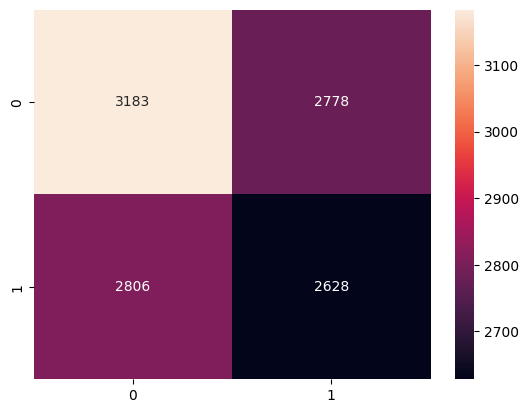

In [7]:
X = all_n_we_with_freq["0"].values
km = KMeans(n_clusters=2, random_state=42).fit(X.reshape(-1, 1))
y_pred = km.labels_
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)
import seaborn as sns
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d")

### 1 dimension

In [8]:
# Clustering
def dim_clustering_df(true_labels, dim_list, df, one_dim, sort_by = "p_micro"):

    d = {} # global dictionary
    counter = 0

    for dim in dim_list:
        d[dim] = {} # metrics dictionary for this dimension

        # KMeans clustering
        if one_dim:
            X = df[dim].values.reshape(-1, 1)
        else:
            X = df[[dim[i] for i in range(len(dim))]].values
        km = KMeans(n_clusters=2, random_state=42, n_init=10)
        km.fit(X)

        # KMeans returns labels 0 and 1 for clusters, however, we can't be sure if original labels' 1s correspond to
        # KMeans' 1s or 0s. That's why we are going to evaluate 2 cases: inverted and non-inverted labels
        y_pred1, y_pred2 = km.labels_, abs(km.labels_ - 1)

        # Evaluation
        p1_micro, r1_micro, f1_micro, nsamples = precision_recall_fscore_support(true_labels, y_pred1, average='micro', zero_division=0)
        d[dim] = {"p_micro": p1_micro, "r_micro": r1_micro, "f_micro": f1_micro}

        counter += 1

        if counter % (len(dim_list) // 10 ) == 0:
            print(counter, f"dimensions / {len(dim_list)} processed")

    df = pd.DataFrame(d).T

    return df.sort_values(by=sort_by, ascending=False)

In [9]:
top_dim_1 = dim_clustering_df(y, dim_list, all_n_we_with_freq, one_dim = True)

51 dimensions / 511 processed
102 dimensions / 511 processed
153 dimensions / 511 processed
204 dimensions / 511 processed
255 dimensions / 511 processed
306 dimensions / 511 processed
357 dimensions / 511 processed
408 dimensions / 511 processed
459 dimensions / 511 processed
510 dimensions / 511 processed


In [10]:
top_dim_1[:20]

,p_micro,r_micro,f_micro
100,0.591400,0.591400,0.591400
195,0.582887,0.582887,0.582887
316,0.579377,0.579377,0.579377
202,0.567442,0.567442,0.567442
192,0.565687,0.565687,0.565687
434,0.561562,0.561562,0.561562
377,0.561474,0.561474,0.561474
470,0.560685,0.560685,0.560685
5,0.554892,0.554892,0.554892
40,0.551821,0.551821,0.551821


### 2 dimensions

In [11]:
from itertools import combinations

# Pairs of dimensions
dim_pairs = list(combinations(dim_list, 2))

In [12]:
pair = dim_pairs[0]
all_n_we_with_freq[[pair[0], pair[1]]]
all_n_we_with_freq[[pair[i] for i in range(len(pair))]].values

array([[ 1.6503557,  2.463752 ],
       [-3.6192389,  6.01018  ],
       [ 0.3912565, -0.5266256],
       ...,
       [-4.772968 ,  6.019509 ],
       [-2.4145749, -3.748237 ],
       [-2.7508876, -2.4956858]])

In [13]:
top_dim_2 = dim_clustering_df(y, dim_pairs[:1000], all_n_we_with_freq, one_dim = False)

100 dimensions / 1000 processed
200 dimensions / 1000 processed
300 dimensions / 1000 processed
400 dimensions / 1000 processed
500 dimensions / 1000 processed
600 dimensions / 1000 processed
700 dimensions / 1000 processed
800 dimensions / 1000 processed
900 dimensions / 1000 processed
1000 dimensions / 1000 processed


In [14]:
top_dim_2[:20]

p_micro   r_micro   f_micro
2 192  0.567968  0.567968  0.567968
  403  0.564985  0.564985  0.564985
1 192  0.563932  0.563932  0.563932
  499  0.560333  0.560333  0.560333
2 293  0.557262  0.557262  0.557262
  202  0.556209  0.556209  0.556209
1 293  0.555244  0.555244  0.555244
2 434  0.554629  0.554629  0.554629
1 310  0.551470  0.551470  0.551470
  40   0.551119  0.551119  0.551119
2 40   0.550943  0.550943  0.550943
  363  0.550592  0.550592  0.550592
  390  0.550329  0.550329  0.550329
  488  0.550241  0.550241  0.550241
  279  0.549890  0.549890  0.549890
1 52   0.547872  0.547872  0.547872
  472  0.547433  0.547433  0.547433
2 123  0.546819  0.546819  0.546819
1 115  0.546117  0.546117  0.546117
2 250  0.545941  0.545941  0.545941